In [1]:
import datetime
import mysql.connector
import operator
import numpy as np
from scipy import special

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

import plotly as py
import plotly.graph_objs as go

import ipywidgets as widgets

import pandas as pd
import datetime
import seaborn as sb

In [2]:
sb.set()

In [3]:
py.offline.init_notebook_mode(connected = True)

### Time Series Plot of Picroside III (Metabolite_id = 1288)

In [14]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select metabolite_id, 
                                        metab_name,
                                        provider_name, 
                                        date, 
                                        max(price_per_g) as maximo, 
                                        avg(price_per_g) as media, 
                                        min(price_per_g) as minimo, 
                                        count(price) as num_price
                                        from (
                                                select bioanalysis_metabolite_price.metabolite_id,
                                                       bioanalysis_metabolite.common_name                    as metab_name,
                                                       bioanalysis_metabolite_price.date, 
                                                       bioanalysis_metabolite_price.price                    as price, 
                                                       bioanalysis_metabolite_price.amount                   as amount, 
                                                       bioanalysis_metabolite_price.unity                    as unity, 
                                                       if(provider.name is null, "None", provider.name)      as provider_name, 
                                                       price/amount                                          as price_per_unity,
                                                       price/amount*convert_to_g(unity)                      as price_per_g,
                                                       price/amount*convert_to_l(unity)                      as price_per_l
                                                from bioanalysis_metabolite_price
                                                JOIN provider 
                                                    on provider.id = bioanalysis_metabolite_price.provider_id
                                                JOIN bioanalysis_metabolite
                                                    on bioanalysis_metabolite_price.metabolite_id = bioanalysis_metabolite.id
                                                where (convert_to_g(unity) is not null 
                                                or convert_to_l(unity) is not null )       #da apenas os preços por grama, litro e derivados
                                        ) as metab_prices
                                        where metabolite_id= 1287
                                        group by metabolite_id, provider_name, date; ''', cnx, index_col = 'date', parse_dates=True) 


df = pd.DataFrame(sql_query, columns=['metabolite_id', 'metab_name', 'provider_name', 'maximo', 'media', 'minimo', 'num_price' ])



In [15]:
df

,metabolite_id,metab_name,provider_name,maximo,media,minimo,num_price
date,,,,,,,
2017-09-29 18:30:34,1287,Picroside III,ChemFaces,0.1106,0.061000,0.01140,2
2017-09-29 18:30:34,1287,Picroside III,"AnalytiCon Discovery, GmbH",0.2625,0.093098,0.06125,32
2017-09-29 18:30:34,1287,Picroside III,Labseeker,1833.0000,916.511675,0.02335,2
2017-12-07 19:55:59,1287,Picroside III,ChemFaces,0.1106,0.061000,0.01140,2
2017-12-07 19:55:59,1287,Picroside III,"AnalytiCon Discovery, GmbH",0.2625,0.093098,0.06125,32
2017-12-07 19:55:59,1287,Picroside III,Labseeker,1833.0000,916.511675,0.02335,2
2018-01-07 19:56:08,1287,Picroside III,ChemFaces,0.1106,0.061000,0.01140,2
2018-01-07 19:56:08,1287,Picroside III,"AnalytiCon Discovery, GmbH",0.2625,0.093098,0.06125,32
2018-01-07 19:56:08,1287,Picroside III,Labseeker,1833.0000,916.511675,0.02335,2


Text(0, 0.5, 'Price (USD)')

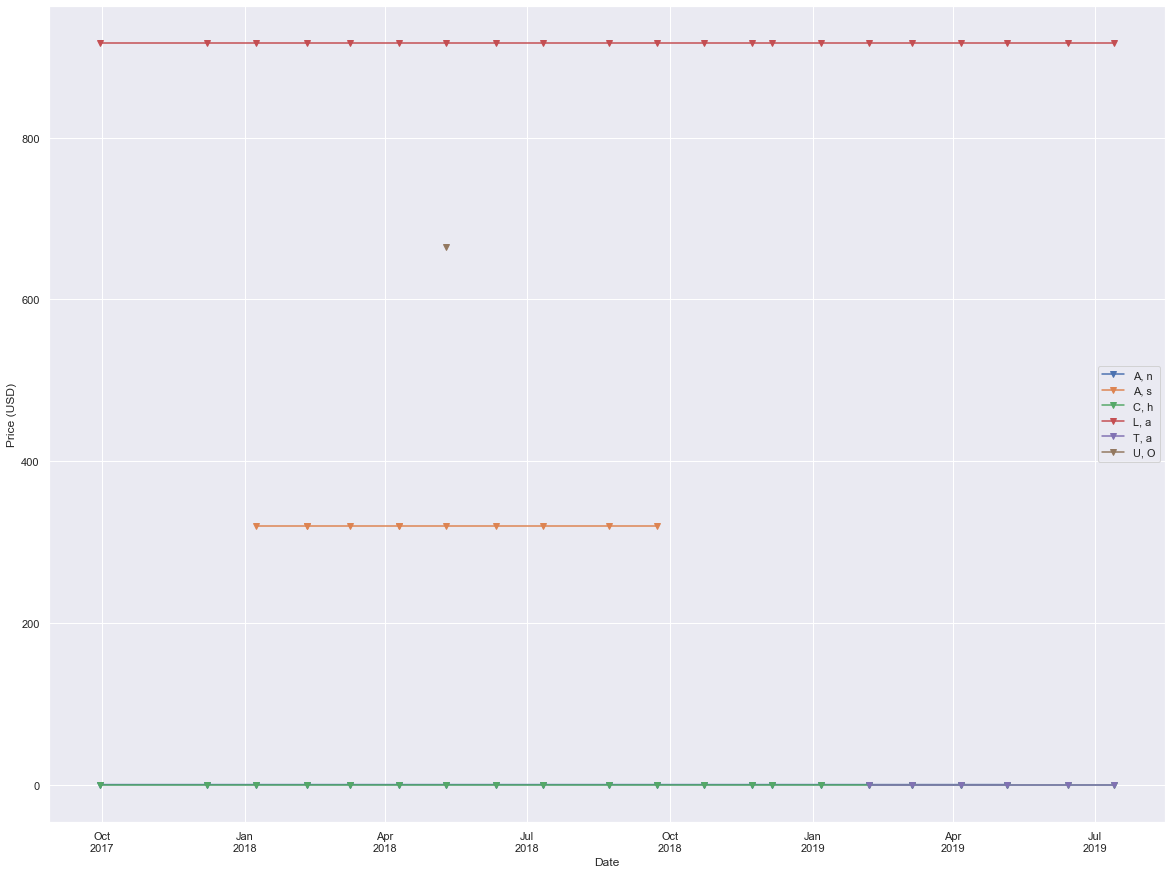

In [41]:
#Create plot!!
df = df.sort_index()

fig, ax = plt.subplots(figsize=(20, 15))
for k,g in df.groupby(['provider_name'])['media']:
    ax.plot_date(pd.to_datetime(g.index),g,'v-',label="{}, {}".format(*k))

#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
#plt.show()

In [44]:
grouped_df = df.groupby('provider_name')

for key, item in grouped_df:
    print('key:', key)
    print(grouped_df.get_group(key), "\n\n")

key: AnalytiCon Discovery, GmbH
                     metabolite_id     metab_name               provider_name  \
date                                                                            
2017-09-29 18:30:34           1287  Picroside III  AnalytiCon Discovery, GmbH   
2017-12-07 19:55:59           1287  Picroside III  AnalytiCon Discovery, GmbH   
2018-01-07 19:56:08           1287  Picroside III  AnalytiCon Discovery, GmbH   
2018-02-09 16:13:19           1287  Picroside III  AnalytiCon Discovery, GmbH   
2018-03-09 18:30:57           1287  Picroside III  AnalytiCon Discovery, GmbH   
2018-04-09 20:06:03           1287  Picroside III  AnalytiCon Discovery, GmbH   
2018-05-10 00:47:13           1287  Picroside III  AnalytiCon Discovery, GmbH   
2018-06-11 14:47:24           1287  Picroside III  AnalytiCon Discovery, GmbH   
2018-07-11 14:47:53           1287  Picroside III  AnalytiCon Discovery, GmbH   
2018-08-22 19:40:24           1287  Picroside III  AnalytiCon Discovery, GmbH

In [47]:
#Create plot with plotly

df = df.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of Picroside III (1g)',
    yaxis = dict(
        title = 'price(USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)

prov_list = []
for key, item in grouped_df:
    prov_list.append(key)
    

d_x = {}
d_y = {}
for k,g in df.groupby(['provider_name'])['media']:
    x = pd.to_datetime(g.index)
    y = g.values
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a provider lacking on the x or y dict.')
    


def update_plot(signals):#, freq):
   data = []
   for s in signals:
       trace1 = go.Scatter(
           x = d_x[s],
           y = d_y[s],
           mode = 'lines+markers',
           name = 'provider {}'.format(s),
           line = dict(
               shape = 'spline' #smooth line
           )
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
signals = widgets.SelectMultiple(options = prov_list, description = 'Provider')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Provider', options=('AnalytiCon Discovery, GmbH', 'Astatech …